<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-и-Предобработка-данных" data-toc-modified-id="Изучение-и-Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение и Предобработка данных</a></span></li><li><span><a href="#Диаграмма-корреляции-данных" data-toc-modified-id="Диаграмма-корреляции-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Диаграмма корреляции данных</a></span></li><li><span><a href="#Создадим-выборки-и-приведём-объекты-выборок-к-единому-масштабу" data-toc-modified-id="Создадим-выборки-и-приведём-объекты-выборок-к-единому-масштабу-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Создадим выборки и приведём объекты выборок к единому масштабу</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#downsampling" data-toc-modified-id="downsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>downsampling</a></span></li><li><span><a href="#взвешивание-классов-class_weight" data-toc-modified-id="взвешивание-классов-class_weight-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>взвешивание классов class_weight</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve, auc

In [2]:
# отключаем некритические предупреждения в коде
warnings.filterwarnings("ignore")
# два знака
# pd.set_option('display.float_format', '{:,.2f}'.format)
# все столбцы
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/datasets/Churn.csv")

### Изучение и Предобработка данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В данном датасете 13 признаков, включая целевой признак, 10000 строк.

Признаки:

- RowNumber — индекс строки в данных (int64)
- CustomerId — уникальный идентификатор клиента (int64)
- Surname — фамилия (object)
- CreditScore — кредитный рейтинг (int64)
- Geography — страна проживания (object)
- Gender — пол (object)
- Age — возраст (int64)
- Tenure — количество недвижимости у клиента (float64)
- Balance — баланс на счёте (float64)
- NumOfProducts — количество продуктов банка, используемых клиентом (int64)
- HasCrCard — наличие кредитной карты (int64)
- IsActiveMember — активность клиента (int64)
- EstimatedSalary — предполагаемая зарплата (float64) 

Целевой признак:
- Exited — факт ухода клиента (int64)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Переименуем названия столбцов в нашем датафрейме:

In [6]:
df.columns = ['row_number', 'customer_id', 'surname','credit_score', 'geography', 'gender', 'age', 'tenure', 
              'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']

Приведем к нижнему регистру значения столбцов Gender и Geography

In [7]:
df['gender'] = df['gender'].str.lower()
df['geography'] = df['geography'].str.lower()

Имеются пропуски в количестве недвижимости у клиента. Это вероятней всего означает, что у клиента нет ее. Значит можно заменить пропуски на 0 и перевести в целочисленный тип.

In [8]:
df['tenure'].isnull().sum()

909

In [9]:
df['tenure'] = df['tenure'].fillna(0).astype('int64')

грубая проверка дубликатов:

In [10]:
print("Количество дубликатов:", df.duplicated().sum())

Количество дубликатов: 0


Признаки, от которых можно избавиться на этапе предобработки: surname, row_number и customer_id. Предполагаем, что id и фамилия клиента совершенно не влияют на факт ухода клиента  

In [11]:
df = df.drop(["row_number","customer_id","surname"], axis = 1)

In [12]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


Подробнее изучим данные, содержащиеся в столбцах:

In [13]:
df.exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

In [14]:
df.gender.value_counts()

male      5457
female    4543
Name: gender, dtype: int64

In [15]:
df.geography.value_counts()

france     5014
germany    2509
spain      2477
Name: geography, dtype: int64

In [16]:
df.has_cr_card.value_counts()

1    7055
0    2945
Name: has_cr_card, dtype: int64

In [17]:
df.is_active_member.value_counts()

1    5151
0    4849
Name: is_active_member, dtype: int64

Методом describe выясним, как распределены данные в количественных признаках:

In [18]:
df[['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']].describe()

,credit_score,age,tenure,balance,num_of_products,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,3.111573,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Применим one hot encoding к датафрейму, избежав "ловушку фиктивных признаков"

In [19]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Вывод:

На этапе предобработки данных мы выполнили первичную подготовку данных для дальнейшего анализа и машинного обучения:

- Переименовали столбцы датафрейма для удобства работы с ними.
- Привели к нижнему регистру значения столбцов gender и geography
- Исправили пропущенные значения в столбце tenure, заменив их на 0, исходя из той гипотезы, что пропущенные значения оказались у тех людей, которые не владеют недвижимостью.
- Изменили тип данных столбца tenure на int, т.к. предполагается наличие целочисленных значений в данном столбце.
- Создали новый датафрейм без лишних столбцов: surname, rowNumber и customerId, а так же создали новые столбцы для категориальных признаков, преобразовав их в численные, воспользовавшись методом преображения (прямого кодирования).

### Диаграмма корреляции данных

Исследуем корреляцию факторов

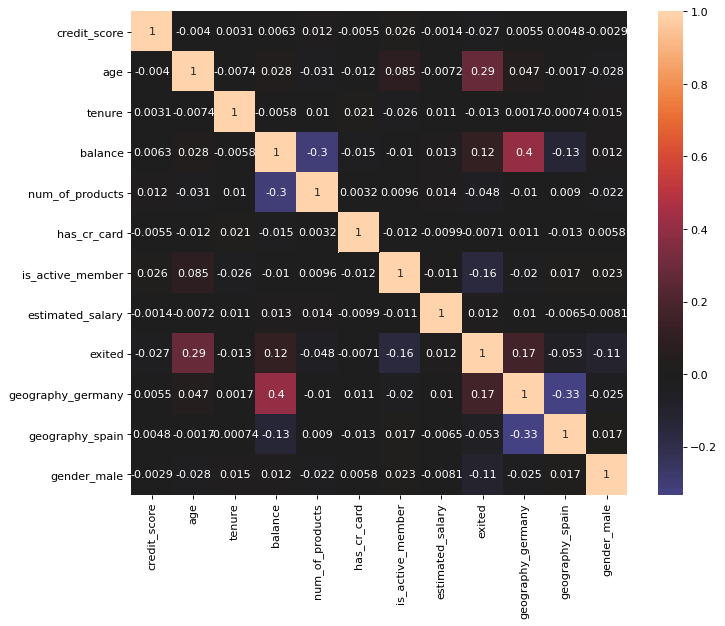

In [20]:
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(df_ohe.corr(), xticklabels=df_ohe.corr().columns, yticklabels=df_ohe.corr().columns, center=0, annot=True)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Мы изучили корреляцию между данными в датасете и выяснили, что между признаками нет сильной корреляции, а это значит, что нам не требуется дополнительная обработка данных, связанная с устранением мультиколлиниарности.

### Создадим выборки и приведём объекты выборок к единому масштабу 

Разобьем исходный датафрейм на 2 части: в features запишем признаки, на основе которых будет делаться предсказание, а в target запишем целевой признак - то значение, которое мы хотим предсказать, т.е. столбец exited.

In [21]:
features = df_ohe.drop('exited', axis=1)
target = df_ohe['exited']

разобьем исходный датасет на 2 выборки: обучающую и тестовую, при этом 75% данных запишем в обучающую выборку, а 25% для окончательной оценки моделей.

In [22]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.25, random_state=12345)


Проверим отношения классов в наших выборках и сравним их с отношением в исходном датафрейме.

In [23]:
print('Отношение классов в исходном датасете:')
print(df_ohe['exited'].value_counts(normalize=True))
print('')

print('Отношение классов в обучающей выборке:')
print(target_train.value_counts(normalize=True))
print('')

print('Отношение классов в тестовой выборке:')
print(target_test.value_counts(normalize=True))
print('')

Отношение классов в исходном датасете:
0    0.7963
1    0.2037
Name: exited, dtype: float64

Отношение классов в обучающей выборке:
0    0.799733
1    0.200267
Name: exited, dtype: float64

Отношение классов в тестовой выборке:
0    0.786
1    0.214
Name: exited, dtype: float64



В выборках классы 0 и 1 соотносятся в тех же пропоруиях, что и в исходном датасете.

Проверка размера выборок:

In [24]:
print('Проверка размера выборок:')
print('df', df.shape)
print('features_train', features_train.shape)
print('features_test', features_test.shape)
print('target_train', target_train.shape)
print('target_test', target_test.shape)

Проверка размера выборок:
df (10000, 11)
features_train (7500, 11)
features_test (2500, 11)
target_train (7500,)
target_test (2500,)


Функция проверящая правильность разбивки

In [25]:
if len(df) == len(features_train) + len(features_test):
    if len(df) == len(target_train) + len(target_test):
        print(
            'Разбиение прошло правильно, выборки относятся как:', 
              str(round(len(features_train + target_train) / len(df), 2)) + ' : ' +
              str(round(len(features_test + target_test) / len(df), 2))
        ) 
else:
    print('Была допущена ошибка при разбиении')

Разбиение прошло правильно, выборки относятся как: 0.75 : 0.25


Случайным образом разбили наш исходный датафрейм на 2 выборки: обучающую и тестовую, при этом выборки относятся как 0.75 : 0.25. Обучающую выборку мы будем использовать для тренировки нашей модели, а тестовую для окончательной оценки модели

Запишем столбцы с количественными признаками в переменную numeric.

In [26]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

Нормируем числовые данные, используя StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

Отмасштабируем признаки, используя метод .transform().

In [28]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [29]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
226,0.442805,-0.841274,1.426885,-1.224577,0.817772,1,1,-1.269750,0,0,0
7756,-0.310897,-0.270730,0.784858,0.641783,-0.896874,1,1,0.960396,0,1,0
2065,-0.259274,-0.556002,1.105871,-1.224577,0.817772,1,0,0.661864,0,0,1
2800,1.217157,1.155631,1.426885,1.290462,0.817772,1,0,-1.039476,0,0,1
7028,0.690598,-1.221637,-1.462240,1.142121,-0.896874,0,0,-0.851729,1,0,1


Мы отмасштабировали данные, используя StandardScaler() из библиотеки sklearn, с помощью которой привели данные к единому масштабу: математическое ожидание признаков стало равно 0, а стандартное отклонение = 1.

Таким образом мы подготовили данные к построению моделей и предсказанию результатов.

## Исследование задачи

Возьмем 3 модели для исследования:

- Модель древа решений DecisionTreeClassifier
- Модель случайного леса RandomForestClassifier
- Модель логистической регрессии LogisticRegression

Обучим модели при стандартным параметрах и вычислим их метрики f1 и roc-auc

In [30]:
dt = DecisionTreeClassifier(random_state=12345)                          # Дерево решений
rf = RandomForestClassifier(random_state=12345)                          # Случайный лес
lr = LogisticRegression(random_state=12345, solver='liblinear')          # Логистическая регрессия
models_list = [dt, rf, lr]
models_dict = {dt:'Дерево решений',
               rf:'Случайный лес',
               lr:'Логистическая регрессия'}

Создадим функцию f1_cv_score. На вход функция будет получать список моделей, признаков, таргета и количества разбиений при кросс-валидации. Возвращать функция будет список с результатами оценок.

In [31]:
def f1_cv_score(models, features, target, cv):
    cv_scores = []
    for model in models:
        score = cross_val_score(model, features, target, cv=cv, scoring='f1').mean()
        cv_scores.append(score)    
            
    return cv_scores

Аналогично создаем функцию roc_auc_cv_score

In [32]:
def roc_auc_cv_score(models, features, target, cv):
    cv_scores = []
    for model in models:
        score = cross_val_score(model, features, target, cv=cv, scoring='roc_auc').mean()
        cv_scores.append(score)    

    return cv_scores

In [33]:
columns = ['DecisionTree', 'RandomForest', 'LogisticRegression']
index = ['f1_cv', 'roc_auc_cv']

scores_f1 = f1_cv_score(models_list, features_train, target_train, 5)
scores_roc_auc = roc_auc_cv_score(models_list, features_train, target_train, 5)

models_pivot_basic = pd.DataFrame(data = [scores_f1, scores_roc_auc], index = index, columns = columns)
models_pivot_basic

,DecisionTree,RandomForest,LogisticRegression
f1_cv,0.490640,0.558635,0.320863
roc_auc_cv,0.683303,0.847566,0.765467


Создаем функцию roc_plotter, которая отрисовывает ROC-кривые при кросс валидации. На вход функция принимает название модели, фичи, таргет и количество разбиений, а возвращает график кривых при кроссвалидации, при этом также вычисляя среднюю кривую.

In [34]:
def roc_plotter(model, features, target, n_splits):

    
    features_train_auc = features.values
    target_train_auc = target.values
    
    cv = StratifiedKFold(n_splits=n_splits)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    fig, ax = plt.subplots(figsize=(10,6))
    for i, (train, valid) in enumerate(cv.split(features_train_auc, target_train_auc)):
        model.fit(features_train_auc[train], target_train_auc[train])
        viz = plot_roc_curve(model, features_train_auc[valid], target_train_auc[valid],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Случайная кривая', alpha=.8)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='green',
            label=r'Средняя ROC кривая (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')
    
    ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0],
           title="ROC-кривая {}".format(models_dict[model]))
    ax.legend(loc="lower right")
    plt.show()

Построим кривые для каждой модели

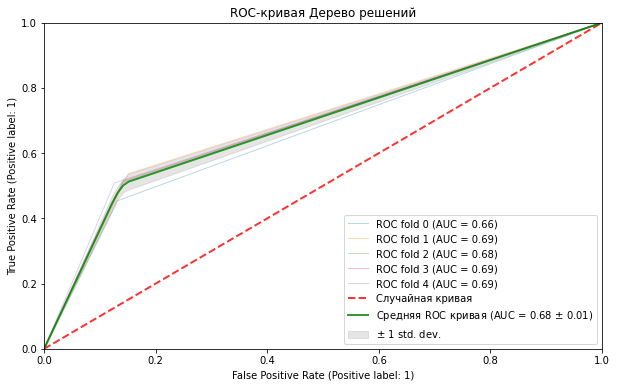

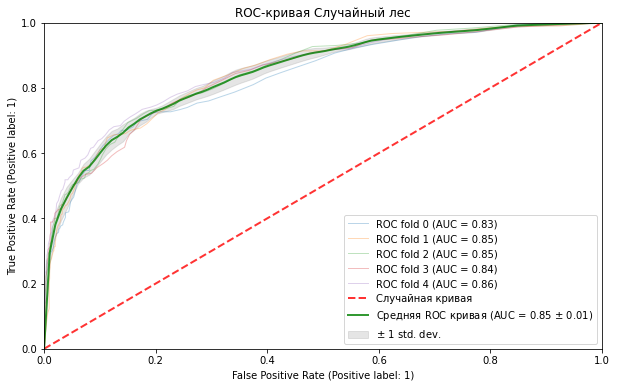

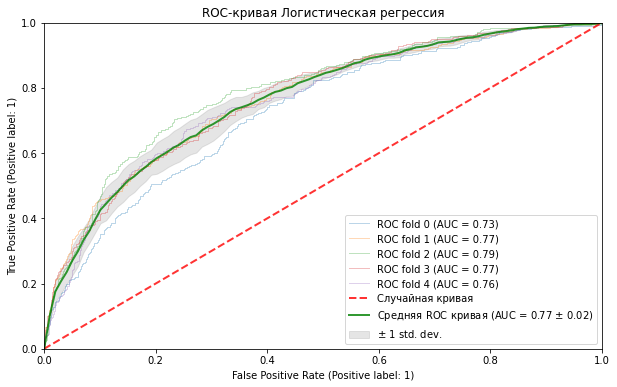

In [35]:
for model in models_list:
    roc_plotter(model, features_train, target_train, 5)

Вывод:

При обучении моделей на тренировочной выборке f1_score довольно низкий, а roc_auc высокий. Это говорит о том, что модели работают плохо, и можно их улучшить.

Ранее мы разбивали выборки, сохраняя то же отношение между классами, что и в исходном датасете, а именно 0.8 : 0.2.

Попробуем устранить дизбаланс классов и проверим, как это скажется на качестве наших моделей

## Борьба с дисбалансом

### downsampling

downsampling - метод заключается в том, чтобы уменьшить частоту самого встречающегося класса. В нашем случае попробуем сбалансировать классы 0.5 к 0.5

Для начала, напишем функцию, которая произведет downsampling попавшей в нее выборки. На вход будет передавать фичи, таргет, отношение в котором уменьшаем класс и сам класс, который необходимо уменьшить.

In [36]:
def downsample(features, target, fraction, downsampling_class):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    if downsampling_class == 0:
        features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
        target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
        features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
        
    if downsampling_class == 1:
        features_downsampled = pd.concat([features_zeros] + [features_ones.sample(frac=fraction, random_state=12345)])
        target_downsampled = pd.concat([target_zeros] + [target_ones.sample(frac=fraction, random_state=12345)])
        features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
       
    return features_downsampled, target_downsampled

Класса 0 в четыре раза больше, чем класса 1. Уменьшим этот класс в 4 раза, используя функцию.

In [37]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25, 0)
print(target_downsampled.value_counts(normalize = 1))
print(target_downsampled.shape)

1    0.500333
0    0.499667
Name: exited, dtype: float64
(3002,)


Построим ROC кривые:

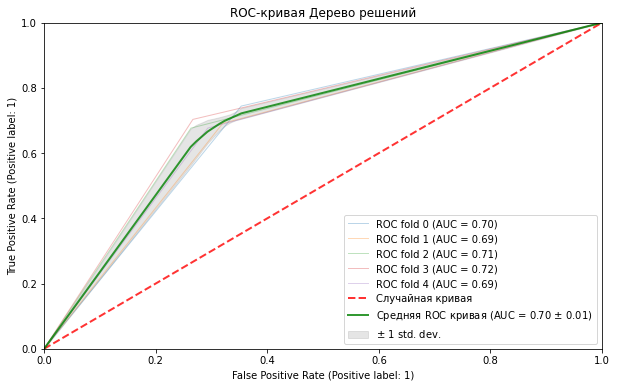

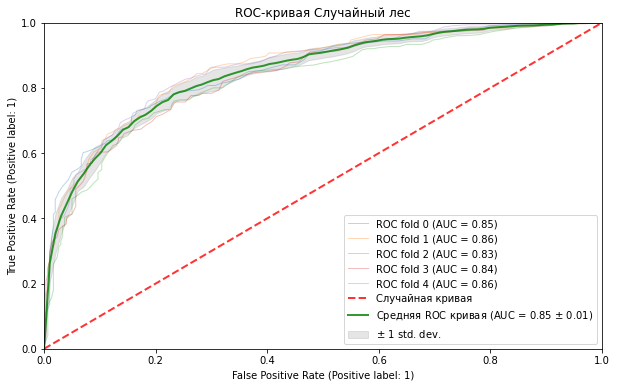

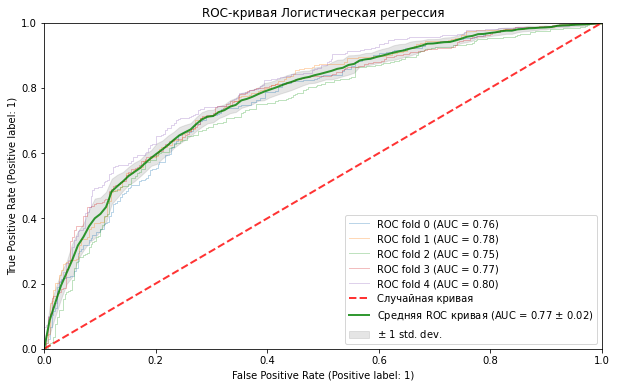

In [38]:
for model in models_list:
    roc_plotter(model, features_downsampled, target_downsampled, 5)

Вычислим метрики при кросс-валидации и сравним результаты с метриками, полученными при обучении непараметризированных моделей.

In [39]:
scores_f1_downsampled = f1_cv_score(models_list, features_downsampled, target_downsampled, 5)
scores_roc_auc_downsampled = roc_auc_cv_score(models_list, features_downsampled, target_downsampled, 5)

models_pivot_basic.loc['f1_cv_downsampled', columns] = scores_f1_downsampled
models_pivot_basic.loc['roc_auc_cv_downsampled', columns] = scores_roc_auc_downsampled

In [40]:
models_pivot_basic.loc[['f1_cv', 'f1_cv_downsampled']]

,DecisionTree,RandomForest,LogisticRegression
f1_cv,0.490640,0.558635,0.320863
f1_cv_downsampled,0.699239,0.765115,0.703086


In [41]:
models_pivot_basic.loc[['roc_auc_cv', 'roc_auc_cv_downsampled']]

,DecisionTree,RandomForest,LogisticRegression
roc_auc_cv,0.683303,0.847566,0.765467
roc_auc_cv_downsampled,0.699522,0.849098,0.771793


Удалось значительно увеличить f1_score для всех моделей, причем значительно, а вот значения AUC-ROC почти не изменились.

### взвешивание классов class_weight

Посмотрим, улучшатся ли показатели модели при добавлении в нее аргумента class_weight = 'balanced'

Для перебора гиперпараметров воспользуемся поиском по сетке GridSearchCV.

In [42]:
%%time

depth_array = np.linspace(1,24,24)              
min_samples_leaf_array = [1,3,5,7,9,11] 
criterion_array = ['gini', 'entropy']
class_weight_array = ['balanced', None]

parameters = {'max_depth': depth_array,
              'criterion': criterion_array,
              'min_samples_leaf': min_samples_leaf_array,
              'class_weight': class_weight_array}


grid_dt = GridSearchCV(dt, param_grid=parameters, scoring = 'f1', cv=5)
grid_dt.fit(features_downsampled, target_downsampled)
print(grid_dt.best_score_)
print(grid_dt.best_estimator_)

dt_bestmodel = grid_dt.best_estimator_

0.7690871858458428
DecisionTreeClassifier(class_weight='balanced', max_depth=7.0,
                       min_samples_leaf=5, random_state=12345)
CPU times: user 35.7 s, sys: 110 ms, total: 35.8 s
Wall time: 35.9 s


In [43]:
%%time
depth_array = np.linspace(1,10,10)
min_samples_leaf_array = [1,5,9]
criterion_array = ['gini', 'entropy']
class_weight_array = ['balanced', None]
est_array = [10,90]

parameters = {'max_depth': depth_array,
              'criterion': criterion_array,
              'min_samples_leaf': min_samples_leaf_array,
              'class_weight': class_weight_array,
              'n_estimators': est_array}


grid_rf = GridSearchCV(rf, param_grid=parameters, scoring = 'f1', cv=5)
grid_rf.fit(features_downsampled, target_downsampled)
print(grid_rf.best_score_)
print(grid_rf.best_estimator_)

rf_bestmodel = grid_rf.best_estimator_

0.7677383405529195
RandomForestClassifier(max_depth=10.0, n_estimators=90, random_state=12345)
CPU times: user 2min 31s, sys: 1.33 s, total: 2min 32s
Wall time: 2min 33s


In [44]:
%%time

C_array = np.logspace(-2, 3, 20)                  
intercept_array = np.linspace(1,6,6)             
penalty_array = ['l1', 'l2'] 
class_weight_array = ['balanced', None]

parameters = {'C': C_array, 
              'intercept_scaling': intercept_array, 
              'penalty':penalty_array,
              'class_weight':class_weight_array}


grid_lr = GridSearchCV(lr, scoring = 'f1', param_grid=parameters, cv=5) 
                       
grid_lr.fit(features_downsampled, target_downsampled)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)

lr_bestmodel = grid_lr.best_estimator_

0.7094448422882434
LogisticRegression(C=0.03359818286283781, intercept_scaling=6.0, penalty='l1',
                   random_state=12345, solver='liblinear')
CPU times: user 22.4 s, sys: 136 ms, total: 22.5 s
Wall time: 22.6 s


Для всех моделей лучшими оказались параметры, содержащие class_weight='balanced'

In [45]:
best_models = [dt_bestmodel, rf_bestmodel, lr_bestmodel]
models_dict = {dt_bestmodel:'Дерево решений',
               rf_bestmodel:'Случайный лес',
               lr_bestmodel:'Логистическая регрессия'}

In [46]:
scores_f1_gridsearch = f1_cv_score(best_models, features_downsampled, target_downsampled, 5)
scores_roc_auc_gridsearch = roc_auc_cv_score(best_models, features_downsampled, target_downsampled, 5)

models_pivot_basic.loc['f1_gridsearch', columns] = scores_f1_gridsearch
models_pivot_basic.loc['roc_auc_gridsearch', columns] = scores_roc_auc_gridsearch

Построим ROC-кривые моделей:

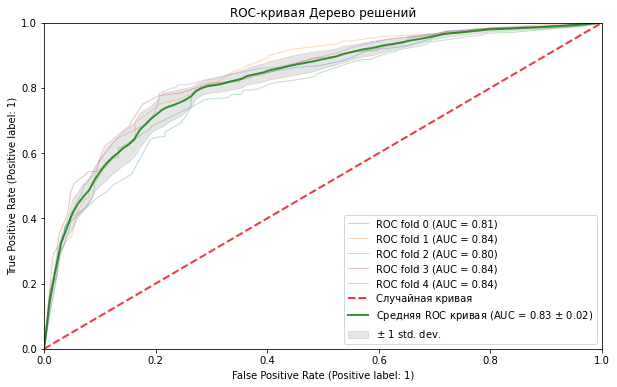

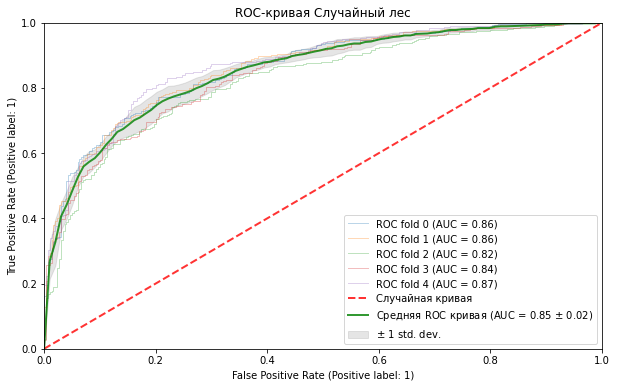

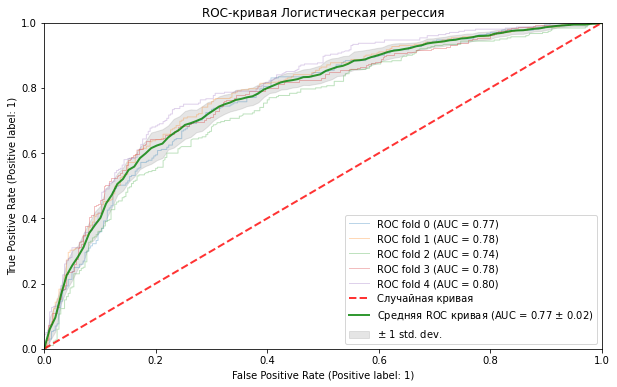

In [47]:
for model in best_models:
    roc_plotter(model, features_downsampled, target_downsampled, 5)

Cравним окончательные оценки моделей после подбора гиперпараметров

In [48]:
models_pivot_basic.loc[['f1_cv', 'f1_cv_downsampled', 'f1_gridsearch', 'roc_auc_cv', 'roc_auc_cv_downsampled', 'roc_auc_gridsearch']]

,DecisionTree,RandomForest,LogisticRegression
f1_cv,0.490640,0.558635,0.320863
f1_cv_downsampled,0.699239,0.765115,0.703086
f1_gridsearch,0.769087,0.767738,0.709445
roc_auc_cv,0.683303,0.847566,0.765467
roc_auc_cv_downsampled,0.699522,0.849098,0.771793
roc_auc_gridsearch,0.825894,0.852464,0.774242


Вывод:

В результате удалось значительно улучшить модели, увиличив метрики, за счет downsampling и взвешивание классов.

Окончательные результаты:

Лучшая модель - дерево решений:
- f1 мера увеличилась с 0.49 до 0.769 
- roc_auc увеличилась с 0.683 до 0.825 

Следующая модель по f1 мере - случайный лес:
- f1 мера увеличилась с 0.55 до 0.76 
- roc_auc осталась практически неизменной

Худшая метрика у логистической регрессии:
- f1 мера увеличилась с 0.32 до 0.709 
- roc_auc осталась практически неизменной  

## Тестирование модели

Последним шагом в нашем проекте является тестирование модели в боевых условиях.

Ранее мы отобрали из общего датасета выборку, в которой классы относятся как 0.8:0.2, а так же сами данные не отмасштабированы. Выясним, как поведет себя модель в таких условиях:

In [49]:
test_scores_f1 = []
test_scores_auc = []
for model in best_models:
    test_scores_f1.append(f1_score(target_test, model.predict(features_test)))
    test_scores_auc.append(roc_auc_score(target_test, model.predict(features_test)))
    
models_pivot_basic.loc['f1_test', columns] = test_scores_f1
models_pivot_basic.loc['roc_auc_test', columns] = test_scores_auc

In [50]:
models_pivot_basic.loc[['f1_test','roc_auc_test']]

,DecisionTree,RandomForest,LogisticRegression
f1_test,0.585470,0.608696,0.523582
roc_auc_test,0.767573,0.781910,0.719267


По требованиям, было необходимо получить значение F1 меры больше, чем 0.59. С этим условием справилась только модель случайного леса, ее метрики:

- F1 мера = 0.608
- AUC-ROC = 0.781

Модель случайного леса единственная из выбранных моделей превысила порог F1 меры 0.59. Ее метрики на тестовой выборке:

- F1 мера = 0.608
- AUC-ROC = 0.781

Для преодоления порога потребовалось провести подготовку данных, которая состояла из:

- Изучения общей информации о данных
- Предобработке пропущенных значений, названий столбцов и изменении типов данных
- Изучении взаимосвязей в данных
- Разбиении данных на обучающую и тестовую выборки
- Масштабировании обучающих данных

После этого были выбраны 3 модели: DecisionTree, RandomForest, LogisticRegression и вычислены их метрики используя кросс-валидацию. Оказалось, что модели имеют низкую F1 меру, но при этом высокую AUC-ROC.

Для того, чтобы улучшить модели был устранен диcбаланс классов и проведен подбор гиперпараметров моделей. Это позволило улучшить метрики и значительно увеличить F1 меру.

Улучшенные модели протестировали и выяснили, что модели DecisionTree и LogisticRegression не проходят требуемый порог > 0.59.